# Objective:
To implement the techniques learnt as a part of the course.

## Learning Outcomes:
* Pre-processing of image data.
* Visualization of images.
* Building CNN.
* Evaluate the Model.
* The motive of the project is to make the learners capable to handle images/image classification problems, during this process you should also be capable to handle real image files, not just limited to a numpy array of image pixels.

### Import libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path="/content/drive/My Drive/AIML/Project 7 - Computer Vision/"

In [ ]:
import cv2 as cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

from tensorflow.keras.models import Sequential          
from tensorflow.keras.layers import Conv2D              
from tensorflow.keras.layers import MaxPooling2D        
from tensorflow.keras.layers import BatchNormalization        
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.layers import Flatten             
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import optimizers
from sklearn.metrics import confusion_matrix

### Read data into X and Y and check the shape

In [ ]:
X = np.load(data_path+'images.npy')
Y = pd.read_csv(data_path+'Labels.csv') 
print('Shape of X is: ', X.shape)
print('Minimum value is: ', X.min())
print('Maximum value is: ', X.max())
print()
print('Shape of Y is: ', Y.shape)

Shape of X is:  (4750, 128, 128, 3)
Minimum value is:  0
Maximum value is:  255

Shape of Y is:  (4750, 1)


### Visualize Images

This is:  Small-flowered Cranesbill


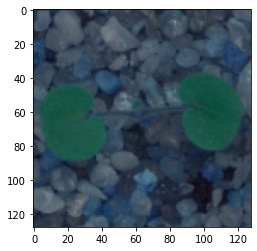

This is:  Fat Hen


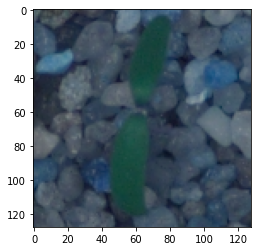

This is:  Shepherds Purse


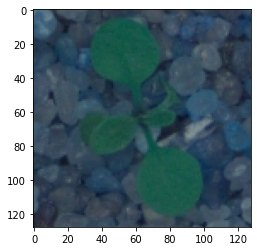

This is:  Common wheat


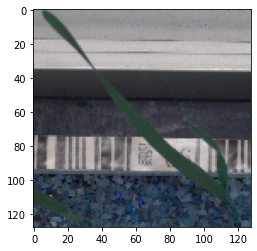

This is:  Common Chickweed


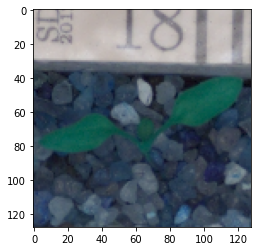

This is:  Charlock


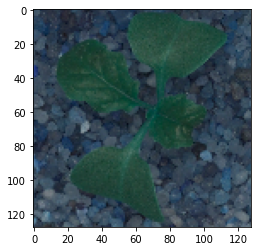

This is:  Cleavers


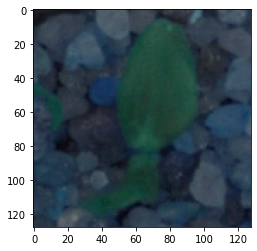

This is:  Scentless Mayweed


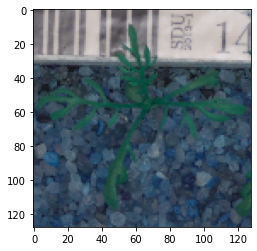

This is:  Sugar beet


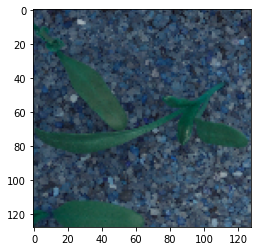

This is:  Maize


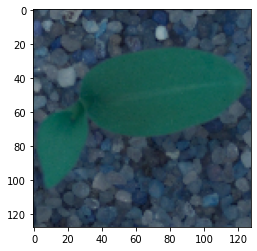

This is:  Black-grass


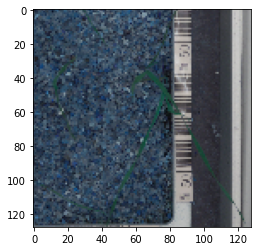

This is:  Loose Silky-bent


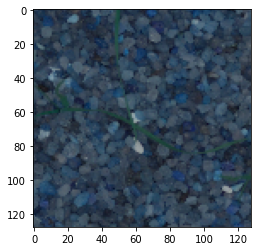

In [ ]:
cur_label = '  '
for i in range(len(Y)):
  label = Y.iloc[i][0]
  if label != cur_label:
    img = X[i]
    print('This is: ',label)
    plt.imshow(img);
    plt.show()
    cur_label = label

### Data Pre-processing

##### Normalize the data

In [ ]:
X = X.astype('float32') / 255.0

##### Check the shape, min and max post normalization

In [ ]:
print('Shape post normalization: ', X.shape)
print('Minimum value is: ', X.min())
print('Maximum value is: ', X.max())

Shape post normalization:  (4750, 128, 128, 3)
Minimum value is:  0.0
Maximum value is:  1.0


 ##### Apply gaussian blur

In [ ]:
X_blur=[]
for i in range(len(Y)):
   X_blur.append(cv2.GaussianBlur(X[i], (5, 5), 0))  
X_blur=np.array(X_blur)   

##### Visualize data after pre-processing

This is:  Small-flowered Cranesbill


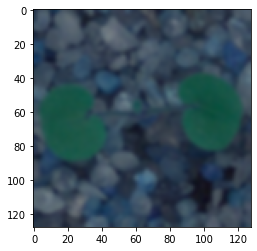

This is:  Fat Hen


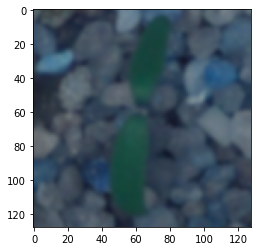

This is:  Shepherds Purse


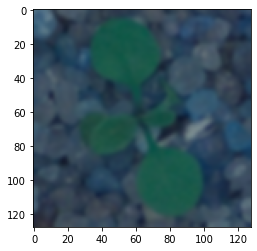

This is:  Common wheat


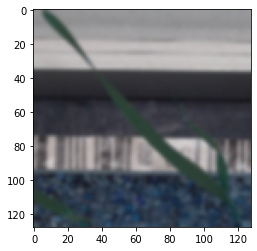

This is:  Common Chickweed


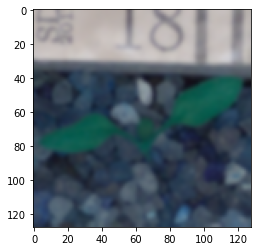

This is:  Charlock


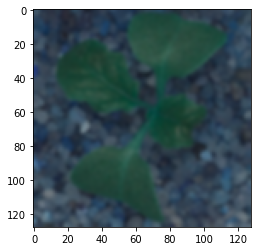

This is:  Cleavers


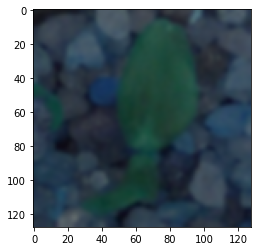

This is:  Scentless Mayweed


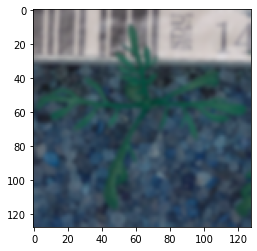

This is:  Sugar beet


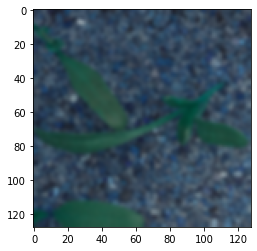

This is:  Maize


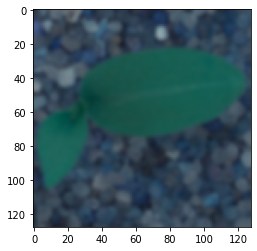

This is:  Black-grass


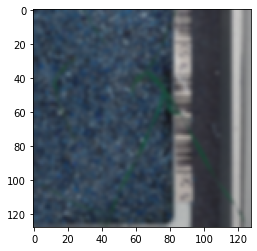

This is:  Loose Silky-bent


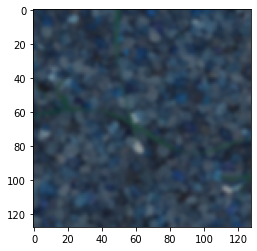

In [ ]:
cur_label = '  '
for i in range(len(Y)):
  label = Y.iloc[i][0]
  if label != cur_label:
    img = X_blur[i]
    print('This is: ',label)
    plt.imshow(img);
    plt.show()
    cur_label = label

##### Encode labels

In [ ]:
encoder = LabelBinarizer()
Y_encoded = encoder.fit_transform(Y)

##### Split data into train, test and validation sets

In [ ]:
# Split train and test set
x_train, x_test, y_train, y_test = train_test_split(X_blur, Y_encoded, test_size=0.3, random_state=42)
print('Shape of x train: ',x_train.shape)
print('Shape of y train: ',y_train.shape)

# Split validation from test set
x_test, x_validation, y_test, y_validation = train_test_split(x_test, y_test, test_size=0.5, random_state=42)
print('Shape of x validation: ',x_validation.shape)
print('Shape of y validation: ',y_validation.shape)
print('Shape of x test: ',x_test.shape)
print('Shape of y test: ',y_test.shape)

Shape of x train:  (3325, 128, 128, 3)
Shape of y train:  (3325, 12)
Shape of x validation:  (713, 128, 128, 3)
Shape of y validation:  (713, 12)
Shape of x test:  (712, 128, 128, 3)
Shape of y test:  (712, 12)


##### Check the label for y_train[0]

In [ ]:
label = y_train[0]
print('Label for y_train[0] is: ', label)

Label for y_train[0] is:  [0 0 1 0 0 0 0 0 0 0 0 0]


##### Check the shape of data

In [ ]:
print('Shape of x_train is : ', x_train.shape)
print('Shape of y_train is : ', y_train.shape)
print('Shape of x_validation is : ', x_validation.shape)
print('Shape of y_validation is : ', y_validation.shape)
print('Shape of x_test is : ', x_test.shape)
print('Shape of y_test is : ', y_test.shape)

Shape of x_train is :  (3325, 128, 128, 3)
Shape of y_train is :  (3325, 12)
Shape of x_validation is :  (713, 128, 128, 3)
Shape of y_validation is :  (713, 12)
Shape of x_test is :  (712, 128, 128, 3)
Shape of y_test is :  (712, 12)


##### As the shape seems to be in compatible shape for the model, we will not reshape.

### Building CNN

In [ ]:
# Set the batch size, number of epochs.
batch_size = 75
epochs = 40
num_classes = y_train.shape[1]
print(num_classes)
input_shp = x_train.shape[1:]
print(input_shp)

print('Data is in compatible shape, hence no need to reshape. Use this as an input to the model.')

12
(128, 128, 3)
Data is in compatible shape, hence no need to reshape. Use this as an input to the model.


##### Define model and layers

In [ ]:
def get_model(input_shp, num_classes):
  classifier = Sequential()

  # Add a Convolution layer with 32 kernels of 3X3 shape with activation function Relu
  classifier.add(Conv2D(32, (3, 3), input_shape = input_shp, activation = 'relu', padding = 'same'))
  # Add a Max Pooling layer of size 2X2
  classifier.add(MaxPooling2D(pool_size = (2, 2)))
  # Add dropout with probability 0.2
  classifier.add(Dropout(0.2))

  # Add another Convolution layer with 64 kernels and 32 kernels of 3X3 shape with activation function Relu
  classifier.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))
  classifier.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
  # Adding another pooling layer
  classifier.add(MaxPooling2D(pool_size = (2, 2)))
  # Add dropout with probability 0.2
  classifier.add(Dropout(0.2))

  # Add another Convolution layer with 64 kernels of 3X3 shape with activation function Relu
  classifier.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
  # Adding another pooling layer
  classifier.add(MaxPooling2D(pool_size = (2, 2)))
  # Add dropout with probability 0.2
  classifier.add(Dropout(0.2))

  # Add another Convolution layer with 64 kernels of 3X3 shape with activation function Relu
  classifier.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
  # Adding another pooling layer
  classifier.add(MaxPooling2D((2, 2)))
  # Add dropout with probability 0.25
  classifier.add(Dropout(0.25))

  # Flattening the layer before fully connected layers
  classifier.add(Flatten())

  # Adding a fully connected layer with 512 neurons
  classifier.add(Dense(units = 512, activation = 'relu'))
  # Adding dropout with probability 0.5
  classifier.add(Dropout(0.5))

  # The final output layer with 12 neurons to predict the categorical classifcation
  classifier.add(Dense(units = num_classes, activation = 'softmax'))
  return classifier

##### Set optimizer and loss function

In [ ]:
# initiate Adam optimizer
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

# Use loss function 'categorical crossentropy'
classifier = get_model(input_shp, num_classes)
classifier.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0

In [ ]:
# Following code is taken from the weekly session on 31st Oct

# Add Early stopping callback to the fit function is going to stop the training,
# if the val_loss is not going to change even '0.001' for more than 10 continous epochs

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

# Add Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
# Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('cifar_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

In [ ]:
# Fit the model
history = classifier.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, validation_data = (x_validation, y_validation), verbose=1, callbacks=[early_stopping,model_checkpoint])

Epoch 1/40
45/45 [==============================] - ETA: 0s - loss: 2.4375 - accuracy: 0.1275
Epoch 00001: val_loss improved from inf to 2.42351, saving model to cifar_cnn_checkpoint_01_loss2.4235.h5
45/45 [==============================] - 126s 3s/step - loss: 2.4375 - accuracy: 0.1275 - val_loss: 2.4235 - val_accuracy: 0.1346
Epoch 2/40
45/45 [==============================] - ETA: 0s - loss: 2.2975 - accuracy: 0.2111
Epoch 00002: val_loss improved from 2.42351 to 1.89598, saving model to cifar_cnn_checkpoint_02_loss1.8960.h5
45/45 [==============================] - 127s 3s/step - loss: 2.2975 - accuracy: 0.2111 - val_loss: 1.8960 - val_accuracy: 0.3913
Epoch 3/40
45/45 [==============================] - ETA: 0s - loss: 1.7840 - accuracy: 0.3774
Epoch 00003: val_loss improved from 1.89598 to 1.54828, saving model to cifar_cnn_checkpoint_03_loss1.5483.h5
45/45 [==============================] - 128s 3s/step - loss: 1.7840 - accuracy: 0.3774 - val_loss: 1.5483 - val_accuracy: 0.4600
Ep

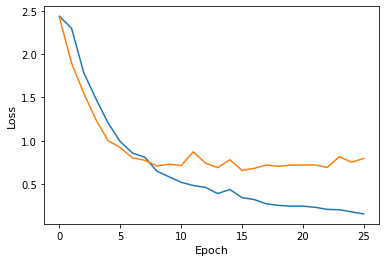

In [ ]:
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('Epoch', fontsize=11)
plt.ylabel('Loss' , fontsize=11)
plt.show()

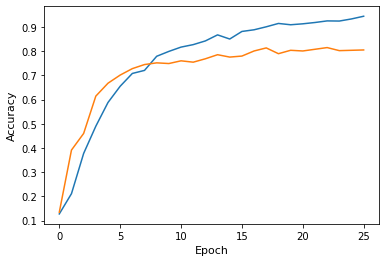

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.xlabel('Epoch', fontsize=11)
plt.ylabel(r'Accuracy', fontsize=11)
plt.show()

### Evaluate the model and print confusion matrix

In [ ]:
# Evaluate the model for test data
loss, accuracy = classifier.evaluate(x_test, y_test)
print('Test loss: {:.2f} \n Test accuracy: {:.2f}'.format(loss, accuracy))

loss, accuracy = classifier.evaluate(x_train, y_train)
print('Train loss: {:.2f} \n Train accuracy: {:.2f}'.format(loss, accuracy))

23/23 [==============================] - 6s 283ms/step - loss: 0.6235 - accuracy: 0.8244
Test loss: 0.62 
 Test accuracy: 0.82
104/104 [==============================] - 31s 300ms/step - loss: 0.0415 - accuracy: 0.9904
Train loss: 0.04 
 Train accuracy: 0.99


##### The model is giving 82% accuracy on test data although it is overfitting on train data.

In [ ]:
# Get the predictions and print the confusion matrix
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5) 

print(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

[[18  0  0  0  1  1 20  0  0  0  0  1]
 [ 0 53  0  0  0  0  0  0  1  1  0  0]
 [ 0  1 42  1  0  1  0  0  3  0  1  0]
 [ 1  0  0 83  0  0  0  2  1  1  0  0]
 [ 6  0  0  1 20  1  2  1  2  0  0  0]
 [ 4  2  1  2  0 60  4  0  0  0  0  1]
 [12  0  1  0  1  1 84  0  2  0  0  0]
 [ 2  0  0  0  0  0  0 27  0  0  0  1]
 [ 1  1  0  2  0  0  0  4 63  2  0  1]
 [ 2  0  0  3  0  1  0  0 10 30  1  1]
 [ 2  1  1  2  0  0  0  2  1  1 61  1]
 [ 0  1  1  0  0  1  0  1  3  0  0 40]]


In [ ]:
# Transform binary labels back to multi-class labels
y_pred_new=encoder.inverse_transform(y_pred)
y_test_new=encoder.inverse_transform(y_test)

### Visualize predictions

Predicted label: Black-grass
Actual label: Loose Silky-bent


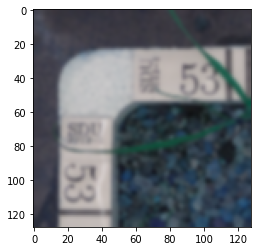

In [ ]:
# Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]
plt.imshow(x_test[2])
print('Predicted label:', y_pred_new[2])
print('Actual label:', y_test_new[2])

Predicted label: Common Chickweed
Actual label: Common Chickweed


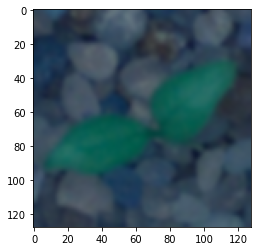

In [ ]:
plt.imshow(x_test[3])
print('Predicted label:', y_pred_new[3])
print('Actual label:', y_test_new[3])

Predicted label: Black-grass
Actual label: Common wheat


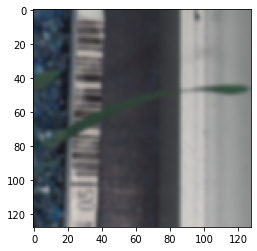

In [ ]:
plt.imshow(x_test[33])
print('Predicted label:', y_pred_new[33])
print('Actual label:', y_test_new[33])

Predicted label: Loose Silky-bent
Actual label: Common wheat


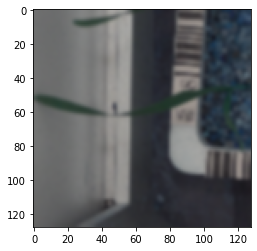

In [ ]:
plt.imshow(x_test[36])
print('Predicted label:', y_pred_new[36])
print('Actual label:', y_test_new[36])

Predicted label: Small-flowered Cranesbill
Actual label: Small-flowered Cranesbill


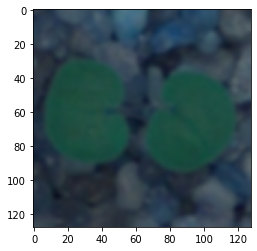

In [ ]:
plt.imshow(x_test[59])
print('Predicted label:', y_pred_new[59])
print('Actual label:', y_test_new[59])

We see from above that model correctly predicts the value for x_test[3], x_test[59] but incorrectly predicts for x_test[2], x_test[33], x_test[36]

### Conclusion
The model performed excellent on train data and gave an accuracy of 99% whereas on test data it had an accuracy of 82%. Hence, the model is an overfitting model and it can be further trained by changing parameters like adding/removing convolutional layers, changing kernels or changing the number of epochs or batch size.